<a href="https://colab.research.google.com/github/utkarshsinh/DBSCAN/blob/main/DBSCAN_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hyper parameters tuning - GridSearch
Initially, for our breast cancer dataset, I will attempt to tune our hyperparameters to achieve the best results. After tuning the hyperparameters, we will use the same hyperparameters for all subsequent calculations.

In [ ]:
pwd

'/content'


Check the directory where I am working, and then upload the dataset to the same folder.Like here, I have uploaded my dataset inside the 'content' folder.

### Importing all the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score as ss # silhoute coeffecient
from sklearn.metrics import normalized_mutual_info_score as nmi # nmi
import matplotlib.pyplot as plt
from typing import List
df = pd.read_csv('breast-cancer.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Data Preprocessing

In [ ]:
df = df.drop("id", axis = 1) # Dropping 'id' column as it's unnecessary

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df = df.drop(df.columns[31], axis = 1) # dropped last column as it has all NaN values

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
labels = df["diagnosis"] # Separating the true labels

In [ ]:
df = df.drop("diagnosis", axis = 1) # Creating feature matrix

In [ ]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Standardizing the dataset

In [ ]:
# Scaling features
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
df_scaled.shape # Dimensions of the array, row and column

(569, 30)

##GridSearch
**References**




*   Youtube Link [DBSCAN Clustering Coding Tutorial in Python & Scikit-Learn](https://youtu.be/VO_uzCU_nKw)
*  Colab Link - [(For YouTube) DBSCAN in Python with Scikit-Learn.ipynb](https://colab.research.google.com/drive/1DphvjpgQXwBWQq08dMyoSc6UREzXLxSE?usp=sharing)




In [ ]:
# Checking different values of epsilon
epsilons = np.linspace(0.1, 3, num=15)
epsilons

array([0.1       , 0.30714286, 0.51428571, 0.72142857, 0.92857143,
       1.13571429, 1.34285714, 1.55      , 1.75714286, 1.96428571,
       2.17142857, 2.37857143, 2.58571429, 2.79285714, 3.        ])

In [ ]:
# Checking different values of minPoints
min_samples = np.arange(2, 15, step=2)
min_samples

array([ 2,  4,  6,  8, 10, 12, 14])

In [ ]:
import itertools
# Trying all combinations of epsilon and minPoints
combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.1, 2),
 (0.1, 4),
 (0.1, 6),
 (0.1, 8),
 (0.1, 10),
 (0.1, 12),
 (0.1, 14),
 (0.30714285714285716, 2),
 (0.30714285714285716, 4),
 (0.30714285714285716, 6),
 (0.30714285714285716, 8),
 (0.30714285714285716, 10),
 (0.30714285714285716, 12),
 (0.30714285714285716, 14),
 (0.5142857142857142, 2),
 (0.5142857142857142, 4),
 (0.5142857142857142, 6),
 (0.5142857142857142, 8),
 (0.5142857142857142, 10),
 (0.5142857142857142, 12),
 (0.5142857142857142, 14),
 (0.7214285714285714, 2),
 (0.7214285714285714, 4),
 (0.7214285714285714, 6),
 (0.7214285714285714, 8),
 (0.7214285714285714, 10),
 (0.7214285714285714, 12),
 (0.7214285714285714, 14),
 (0.9285714285714285, 2),
 (0.9285714285714285, 4),
 (0.9285714285714285, 6),
 (0.9285714285714285, 8),
 (0.9285714285714285, 10),
 (0.9285714285714285, 12),
 (0.9285714285714285, 14),
 (1.1357142857142857, 2),
 (1.1357142857142857, 4),
 (1.1357142857142857, 6),
 (1.1357142857142857, 8),
 (1.1357142857142857, 10),
 (1.1357142857142857, 12),
 (1.13571428571

In [ ]:
# Total Combinations
N = len(combinations)
N

105

### Silhoute Coefecient Scores

In [ ]:
# Getting the best score based on Silhoutte Coefficient
def get_scores_and_labels(combinations, X):
  scores = [] # stores silhoute coefecient scores for all the combinations
  all_labels_list = [] # stores predicted labels result for each combination

  for i, (eps, num_samples) in enumerate(combinations): # traversing for each combination
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X) # fitting the model
    labels = dbscan_cluster_model.labels_ # getting the labels
    labels_set = set(labels) # finding unique clusters
    num_clusters = len(labels_set) # to count the number of clusters
    if -1 in labels_set: # if we have outliers then remove it
      num_clusters -= 1

    if (num_clusters < 1) or (num_clusters > 50): # if number of clusters are less than 1 or more than 50 then ignore it
      scores.append(-10) # appending any dummy value (10 in this case)
      all_labels_list.append('bad') # marking it as bad
      c = (eps, num_samples) # storing and printing this value
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue # finally moving to the next iteration
    # if the number of clusters are in a given range
    scores.append(ss(X, labels)) # adding silhoute coeffecient score
    all_labels_list.append(labels) # adding the predicted cluster to the list
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}") # printing it
  # Now finally getting the best reslults
  best_index = np.argmax(scores) # storing the index of the maximum score
  best_parameters = combinations[best_index] # fetching best hyperparameters values for the best_index
  best_labels = all_labels_list[best_index] # storing the best labels corresponding to the best_index
  best_score = scores[best_index] # saving the best silhoutte score
  # Lastly return all these values
  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, df_scaled) # Function call

Combination (0.1, 2) on iteration 1 of 105 has 0 clusters. Moving on
Combination (0.1, 4) on iteration 2 of 105 has 0 clusters. Moving on
Combination (0.1, 6) on iteration 3 of 105 has 0 clusters. Moving on
Combination (0.1, 8) on iteration 4 of 105 has 0 clusters. Moving on
Combination (0.1, 10) on iteration 5 of 105 has 0 clusters. Moving on
Combination (0.1, 12) on iteration 6 of 105 has 0 clusters. Moving on
Combination (0.1, 14) on iteration 7 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 2) on iteration 8 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 4) on iteration 9 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 6) on iteration 10 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 8) on iteration 11 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 10) on iteration 12 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 12) on iteration 13 of 105 has 0 clusters. Moving o

In [ ]:
best_dict # printing the best values

{'best_epsilon': 3.0,
 'best_min_samples': 4,
 'best_labels': array([-1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,
         0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,
        -1,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,
         0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
         0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,
         0,  0,  0,  0,  0,

**Hence, on the basis of silhoute coeefecient scores eps = 3 and minPoints = 4**

### NMI Scores

In [ ]:
# Getting the best score based on NMI Score
def get_scores_and_labels(combinations, X, true_label):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 1) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(nmi(true_label, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}
# Passing true labels as well, else everything is same as that we did for silhoute coeffecient
best_dict = get_scores_and_labels(combinations, df_scaled, labels)

Combination (0.1, 2) on iteration 1 of 105 has 0 clusters. Moving on
Combination (0.1, 4) on iteration 2 of 105 has 0 clusters. Moving on
Combination (0.1, 6) on iteration 3 of 105 has 0 clusters. Moving on
Combination (0.1, 8) on iteration 4 of 105 has 0 clusters. Moving on
Combination (0.1, 10) on iteration 5 of 105 has 0 clusters. Moving on
Combination (0.1, 12) on iteration 6 of 105 has 0 clusters. Moving on
Combination (0.1, 14) on iteration 7 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 2) on iteration 8 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 4) on iteration 9 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 6) on iteration 10 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 8) on iteration 11 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 10) on iteration 12 of 105 has 0 clusters. Moving on
Combination (0.30714285714285716, 12) on iteration 13 of 105 has 0 clusters. Moving o

In [ ]:
best_dict

{'best_epsilon': 2.3785714285714286,
 'best_min_samples': 14,
 'best_labels': array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,
        -1, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,
         0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        -1, -1, -1,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,
         0,  0,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
        -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,
        -1,  0, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1, -1,
         0,  0,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0,
         0,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,
         0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
         0,




> Based on silhoute coeffecient I'll take *eps = 3* and *min_samples = 4*, beacuse if i'll take consider NMI values then i'll get min_samples = 14 which is way too much




# DBSCAN Class
Reference: [ASMR Coding: DBSCAN clustering algorithm with Python | keyboard typing | soft-spoken](https://youtu.be/cFeo-eV5sHw)




In [ ]:
class DBScan:
  def __init__(self, min_samples: int, eps: float) -> None:
    self.min_samples = min_samples # minPoints
    self.eps = eps # epsilon

  def get_neighbors(self, x_index: int, dataset: np.array) -> List:
    neighbor_indices = []
    for y_index, point_y in enumerate(dataset): # iterating through all the points
      if x_index != y_index and np.linalg.norm(dataset[x_index] - point_y) <= self.eps: # check if point y is in a neighborhood of x
        neighbor_indices.append(y_index) # if yes, then add it to the list of neighbors
    return neighbor_indices

  def is_core(self, x_index: int, dataset: np.array) -> bool:
    return len(self.get_neighbors(x_index, dataset)) >= self.min_samples # check if it's a core point or not

  def visit_neighbors(self, x_index: int, dataset: np.array, cluster_index: int) -> None:
    for neighbor_index in self.get_neighbors(x_index, dataset): # iterate through all neighbors of that point
      if self.cluster_per_point[neighbor_index] == -1: # if it has not been assigned the cluster
        self.cluster_per_point[neighbor_index] = cluster_index # then assign the neighbor to the current cluster
        if self.is_core(neighbor_index, dataset): # but if the neighbor is a core point
          self.visit_neighbors(neighbor_index, dataset, cluster_index) # then recursively visit the neighbor's neighbor and assign it to the same cluster

  def run_clustering(self, dataset: np.array) -> List:
    cluster_index = 0 # initializing the cluster index to zero
    self.cluster_per_point = [-1]*len(dataset) # array to store the cluster of each point, initilizing to -1(noise or outlier)
    for x_index, point_x in enumerate(dataset): # iterate all points in dataset
      if self.cluster_per_point[x_index] != -1: # skip if already assigned
        continue
      if self.is_core(x_index, dataset): # check if it's core
        self.cluster_per_point[x_index] = cluster_index # then assign it to the current cluster
        self.visit_neighbors(x_index, dataset, cluster_index) # and then visit it's neighbors and assign them to the same cluster
      cluster_index += 1 # lastly incrementing the cluster count
      # no else condition to mark it as a noise since we have already initialized our array by -1 (noise)
    return self.cluster_per_point

  def get_core_points(self, dataset: np.array) -> List:
        core_points = [] # to get the list of core points
        for x_index, point_x in enumerate(dataset): # iterating through the dataset
            if self.is_core(x_index, dataset): # check if the current point is a core point
                core_points.append(x_index) # add the index of the current point to the list of core points
        return core_points

### 1. Shuffle the Data (Stability based evaluation)
**Reference:** I encountered errors while plotting the scatter plot, so I used ChatGPT as a reference to resolve them.

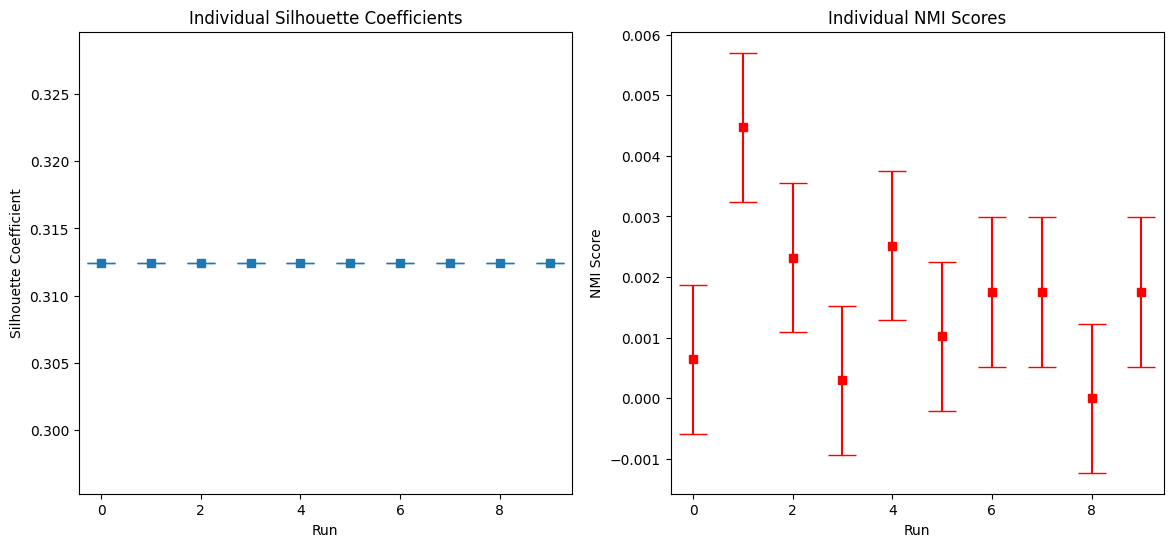

In [ ]:
# dbscan_instance = DBScan(2, 1.25)
# # created an instance of DBScan
# clustering = dbscan_instance.run_clustering(dataset = df.to_numpy())
from sklearn import cluster
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


n_runs = 10
silhouette_scores = []
nmi_scores = []
df_scaled_shuffle = df_scaled

for i in range(n_runs):
    # Shuffle the rows of the input data before each run
    np.random.shuffle(df_scaled_shuffle)


    dbscan_instance = DBScan(4, 3) # Create a DBScan instance with min_samples = 4 and eps = 3
    clustering = dbscan_instance.run_clustering(dataset = df_scaled_shuffle) # run clustering on shuffled dataset
    pred_labels = clustering # assigning to a new variable of pred_labels

    # Evaluate clustering using Silhouette coefficient
    silhouette_coefficient = metrics.silhouette_score(df_scaled_shuffle, pred_labels)
    silhouette_scores.append(silhouette_coefficient)

    # Evaluate clustering using NMI score
    nmi_coefficient = metrics.normalized_mutual_info_score(labels, pred_labels)
    nmi_scores.append(nmi_coefficient)

# Plot individual Silhouette coefficients and NMI scores side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Plot individual Silhouette coefficients
axes[0].errorbar(range(n_runs), silhouette_scores, yerr=np.std(silhouette_scores), fmt='s', capsize=10)
axes[0].set_title('Individual Silhouette Coefficients')
axes[0].set_xlabel('Run')
axes[0].set_ylabel('Silhouette Coefficient')

# Plot individual NMI scores
axes[1].errorbar(range(n_runs), nmi_scores, yerr=np.std(nmi_scores), fmt='s', capsize=10, c='r')
axes[1].set_title('Individual NMI Scores')
axes[1].set_xlabel('Run')
axes[1].set_ylabel('NMI Score')

plt.show()





Mean NMI: 0.0016518406166414969
NMI Standard Deviation: 0.0012314653291280449
Mean Silhouette: 0.3124505150961679
Silhouette Standard Deviation: 2.482534153247273e-17


(0.0, 0.3280520220866006)

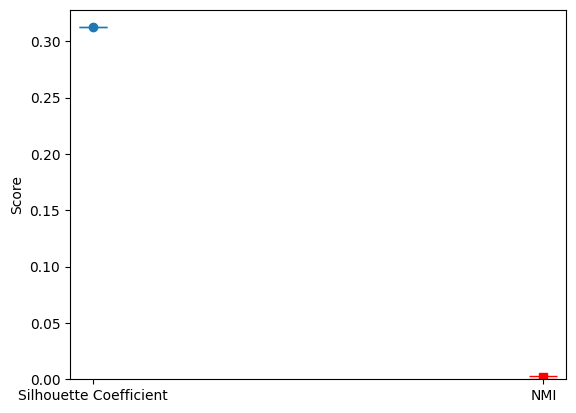

In [ ]:
mean_nmi = np.mean(nmi_scores)
std_nmi = np.std(nmi_scores)
mean_silhouette = np.mean(silhouette_scores)
std_silhouette = np.std(silhouette_scores)
print("Mean NMI:", mean_nmi)
print("NMI Standard Deviation:", std_nmi)

print("Mean Silhouette:", mean_silhouette)
print("Silhouette Standard Deviation:", std_silhouette)
# Plot error bars for Silhouette and NMI scores
plt.errorbar([0], [mean_silhouette], yerr=[std_silhouette], fmt='o', capsize=10)
plt.errorbar([1], [mean_nmi], yerr=[std_nmi], fmt='s', capsize=10, c='r')

# Set x-axis and y-axis labels and limits
plt.xticks([0, 1], ['Silhouette Coefficient', 'NMI'])
plt.ylabel('Score')
plt.ylim(bottom=0)

### 2. Split the Data (K-fold Cross-Validation)
**Reference:** Used ChatGPT for reference and code debugging.

In [ ]:

from sklearn import cluster
from sklearn import metrics
import numpy as np

n_splits = 10
silhouette_scores = []
nmi_scores = []

# Divide the input data and true labels into n_splits parts
X_splits = np.array_split(df_scaled, n_splits)
y_splits = np.array_split(labels, n_splits)

for i in range(n_splits):
    dbscan_instance = DBScan(4, 3)
    clustering = dbscan_instance.run_clustering(dataset = X_splits[i])
    pred_labels = clustering

    # Evaluate clustering using Silhouette coefficient
    silhouette_coefficient = metrics.silhouette_score(X_splits[i], pred_labels)
    silhouette_scores.append(silhouette_coefficient)

    # Evaluate clustering using NMI score
    nmi_coefficient = metrics.normalized_mutual_info_score(y_splits[i], pred_labels)
    nmi_scores.append(nmi_coefficient)

# Print the mean Silhouette coefficient and NMI score over all splits
print("Mean Silhouette coefficient:", np.mean(silhouette_scores))
print("Mean NMI score:", np.mean(nmi_scores))


Mean Silhouette coefficient: 0.146045191215332
Mean NMI score: 0.013313082377718721


In [ ]:
nmi_scores

[0.016894282899275644,
 0.00047970674458427595,
 0.03898362815110715,
 0.001996436494191207,
 0.0018529874485726354,
 0.0004352231998601385,
 0.016538110796932678,
 0.03960771225096732,
 0.0012342946432635838,
 0.015108441148432586]

In [ ]:
silhouette_scores

[0.19530588465720683,
 0.23552835569360644,
 -0.11768553827604976,
 0.08693013585100899,
 0.10512474915789102,
 0.19741384726752936,
 0.24421157829538775,
 0.16653777590139215,
 0.1674986449017577,
 0.17958647870358954]

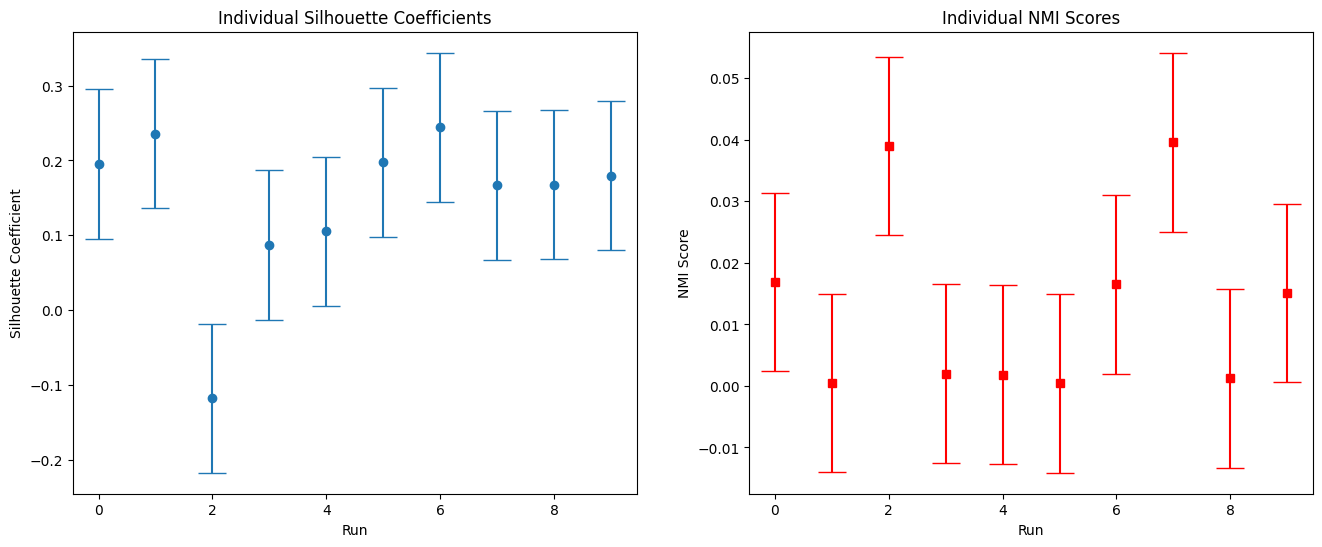

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
n_runs = 10
# Plot individual Silhouette coefficients
ax1.errorbar(range(n_runs), silhouette_scores, yerr=np.std(silhouette_scores), fmt='o', capsize=10)
ax1.set_title('Individual Silhouette Coefficients')
ax1.set_xlabel('Run')
ax1.set_ylabel('Silhouette Coefficient')

# Plot individual NMI scores
ax2.errorbar(range(n_runs), nmi_scores, yerr=np.std(nmi_scores), fmt='s', capsize=10, c='r')
ax2.set_title('Individual NMI Scores')
ax2.set_xlabel('Run')
ax2.set_ylabel('NMI Score')

plt.show()

Mean NMI: 0.013313082377718721
NMI Standard Deviation: 0.014535012037108169
Mean Silhouette: 0.146045191215332
Silhouette Standard Deviation: 0.09971831111481043


(0.0, 0.258112773929619)

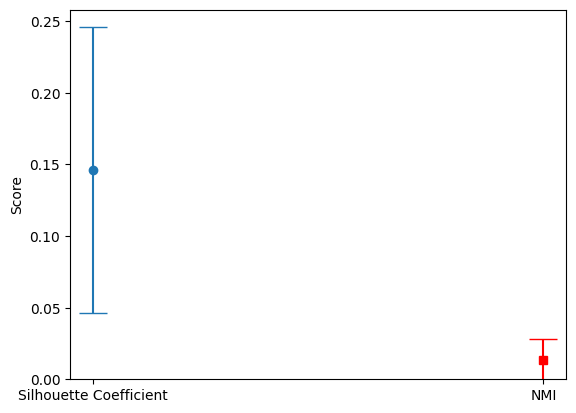

In [ ]:
mean_nmi = np.mean(nmi_scores)
std_nmi = np.std(nmi_scores)
mean_silhouette = np.mean(silhouette_scores)
std_silhouette = np.std(silhouette_scores)
print("Mean NMI:", mean_nmi)
print("NMI Standard Deviation:", std_nmi)

print("Mean Silhouette:", mean_silhouette)
print("Silhouette Standard Deviation:", std_silhouette)
# Plot error bars for Silhouette and NMI scores
plt.errorbar([0], [mean_silhouette], yerr=[std_silhouette], fmt='o', capsize=10)
plt.errorbar([1], [mean_nmi], yerr=[std_nmi], fmt='s', capsize=10, c='r')

# Set x-axis and y-axis labels and limits
plt.xticks([0, 1], ['Silhouette Coefficient', 'NMI'])
plt.ylabel('Score')
plt.ylim(bottom=0)



> For experimental evaluation I'll use the above values of NMI and silhoutee coefecient to compare with other clustering algorithms. i.e k-fold cross validation.


Note: After every run i'm getting slightly different scores.





# Implementation Correctness

In [ ]:
df = pd.read_csv('implementation_correctness_dataset.csv') # reading new dataset

In [ ]:
df

In [ ]:
labels = df['Class/Cluster'] # assigning true labels

In [ ]:
labels

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    2
15    2
16    2
Name: Class/Cluster, dtype: int64

In [ ]:
df = df.drop("Class/Cluster", axis = 1) # segregating true labels

In [ ]:
df

,Feature 1,Feature 2
0,0.020,0.000000
1,1.045,0.000000
2,2.080,0.000000
3,3.125,0.000000
4,4.180,0.000000
5,5.245,0.000000
6,6.320,0.000000
7,7.405,0.000000
8,8.500,0.000000
9,9.605,0.000000


## DBSCAN from existing libraries

In [ ]:
# implemented DBSCAN using existing library
sklearn_dbscan = DBSCAN(eps = 1.25, min_samples=2)
sklearn_clustering = sklearn_dbscan.fit(df)

**Scatter Plot (Existing Library)**

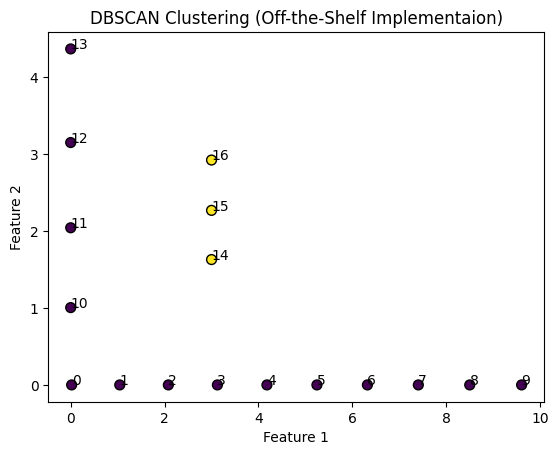

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
X = df.to_numpy()
# Create a DBSCAN object with min_pts = 2 and eps = 1.25
dbscan = DBSCAN(eps=1.25, min_samples=2)

# Fit the DBSCAN model to the dataset
labels = dbscan.fit_predict(X)

# Create a scatter plot with integer labels
plt.scatter(X[:,0], X[:,1], c=labels)
for i, label in enumerate(labels):
    plt.annotate(i, (X[i,0], X[i,1]))

# Denote core and non-core points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) # initializing boolean array for core points with all zeroes
core_samples_mask[dbscan.core_sample_indices_] = True # setting value to True for all the core points
non_core_samples_mask = ~core_samples_mask # marking non-core points
# Scatter plot for core and non-core points respectively
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], marker='o', s=50, linewidth=1, facecolors='none', edgecolors='k')
plt.scatter(X[non_core_samples_mask, 0], X[non_core_samples_mask, 1], marker='o', s=30, linewidth=1, facecolors='w', edgecolors='k')

# Set the title and axis labels
plt.title("DBSCAN Clustering (Off-the-Shelf Implementaion)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
dbscan.core_sample_indices_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score as ss

ss(df, sklearn_clustering.labels_)

-0.029728807189886384

In [ ]:
# NMI
from sklearn.metrics import normalized_mutual_info_score as nmi

nmi_score = nmi(sklearn_clustering.labels_, labels)
print("NMI score: ", nmi_score)

NMI score:  1.0


## DBSCAN from Scratch

In [ ]:
dbscan_instance = DBScan(2, 1.25)
# created an instance of DBScan
clustering = dbscan_instance.run_clustering(dataset = df.to_numpy())

**Scatter Plot (Scratch)**

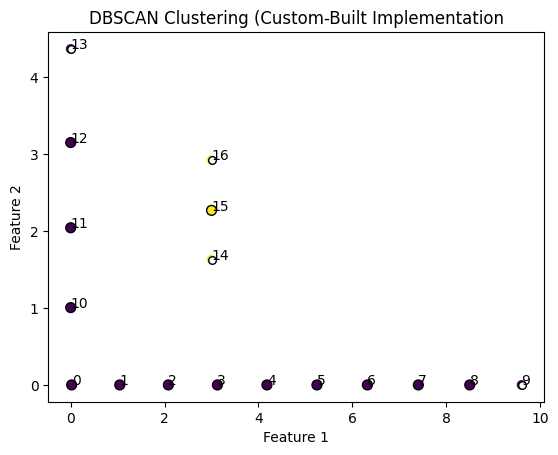

In [ ]:
# dbscan_instance = DBScan(2, 1.25)
# # created an instance of DBScan
# clustering = dbscan_instance.run_clustering(dataset = df.to_numpy())
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
X = df.to_numpy()
# Create a DBSCAN object with min_pts = 2 and eps = 1.25
dbscan = DBScan(2, 1.25)

# Fit the DBSCAN model to the dataset
labels = dbscan.run_clustering(dataset = df.to_numpy())

# Create a scatter plot with integer labels
plt.scatter(X[:,0], X[:,1], c=labels)
for i, label in enumerate(labels):
    plt.annotate(i, (X[i,0], X[i,1]))

# Denote core and non-core points
core_samples_mask = np.zeros_like(labels, dtype=bool) # initializing boolean array for core points with all zeroes
core_samples_mask[dbscan.get_core_points(X)] = True # setting value to True for all the core points
non_core_samples_mask = ~core_samples_mask # marking non-core points
# Scatter plot for core and non-core points respectively
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1], marker='o', s=50, linewidth=1, facecolors='none', edgecolors='k')
plt.scatter(X[non_core_samples_mask, 0], X[non_core_samples_mask, 1], marker='o', s=30, linewidth=1, facecolors='w', edgecolors='k')

# Set the title and axis labels
plt.title("DBSCAN Clustering (Custom-Built Implementation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




> One noticeable difference in this from-scratch implementation is the number of core points, which differs slightly from the implementation done using existing libraries. However, this is not a major concern as the type of clusters formed (yellow and purple) is correct and consistent between the two implementations.
Note: filled circles is for core points and empty circles is for non-core points

In [ ]:
labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]

In [ ]:
dbscan.get_core_points(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15]

In [ ]:
from sklearn.metrics import silhouette_score as ss

ss(df, clustering)

-0.029728807189886384

In [ ]:
from sklearn.metrics import normalized_mutual_info_score as nmi

nmi_score = nmi(clustering, labels)
print("NMI score: ", nmi_score)

NMI score:  1.0


*Since we obtained the same cluster formation, as well as the same silhouette and NMI scores, we can conclude that the implementation of the DBSCAN class is correct.*